# **Seaborning with the Penguins**
### **An analysis of Penguins dataset using Pandas, Matplotlib and Seaborn** 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **List of all the prebuilt datasets in Seaborn and Loading Penguin dataset**

In [ ]:
print(sns.get_dataset_names()) #loading sns prebuilt datasets

In [ ]:
penguins_df =sns.load_dataset('penguins')
penguins_df.head(5)

In [ ]:
penguins_df.columns

In [ ]:
penguins_df.info()

## **Data Cleaning and removal of  NaN 'values'**

In [ ]:
penguins_df = penguins_df.dropna(how='any')
penguins_df.info
penguins_df

# **Summary Statistics Analysis**

In [ ]:
#penguins_df.describe()
penguins_df.describe(include='all').transpose()

## By Using attribute "include='all'" we are able to get categorical data included in the statistics
 ### **Unique** Column 3 species, 3 islands, 2 Sexes, **Top** Column: Adelie specie, Island Biscoe , Sex Male , **Frequency** Column : 152 Adelie, 168 on Biscoe Island, 168/333 Males

# **Penguin Census** 
## 333 Dapper Penguins inhabit the Antarctica islands of Bicoe, Dram and Torgrsen
  

## Findings
- 333 Daper Penguins
- 2 sexes (**Male** - 168 & **Female**- 165) - the population almost evenly matched with males slightly out numbering females

- 3 species - **Adelie**, **Gentoo**, **Chinstrap**  distributed as follows: 
Adlie (146), Gentoo (119) , Chinstrap (68)

- 3 Islands with the majority of Pengiuns live on **Biscoe** Island 168  * ***Dream*** 124 * **Torgersen**  52

- Almost distribution of males vs females across the islands




In [ ]:
penguins_df.species.unique()

In [ ]:
penguins_df.species.value_counts()

In [ ]:
penguins_df.island.unique()

In [ ]:
penguins_df.island.value_counts()

In [ ]:
penguins_df.sex.unique()

In [ ]:
penguins_df.sex.value_counts()

## **Pivot table counting the number of penguins by species on each island**

# **Categorical Data Analysis using pie chart and countplot**









## **Distribution of Penguin Species using Pie chart**

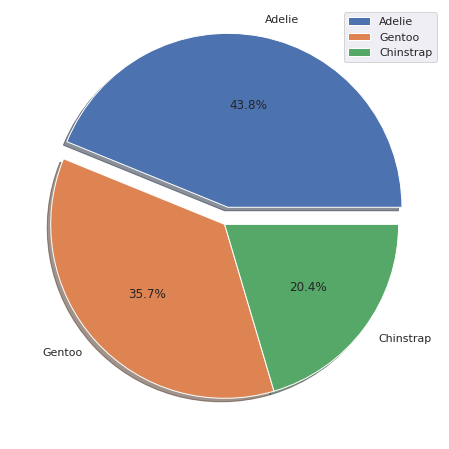

In [86]:
sns.set(rc={'figure.figsize': (12,8)})
x = penguins_df.species.value_counts()
plt.pie(x, labels = ['Adelie', 'Gentoo', 'Chinstrap'], explode = [0.1, 0, 0], autopct = '%1.1f%%' , shadow = True) 
plt.legend()
#plt.title('3 Species of Penguins')
plt.show() 

## Using * **countplot** is kind of like a histogram or a bar graph for some **categorical** area. It simply **shows the number of occurrences** of an item based on a certain type of category.

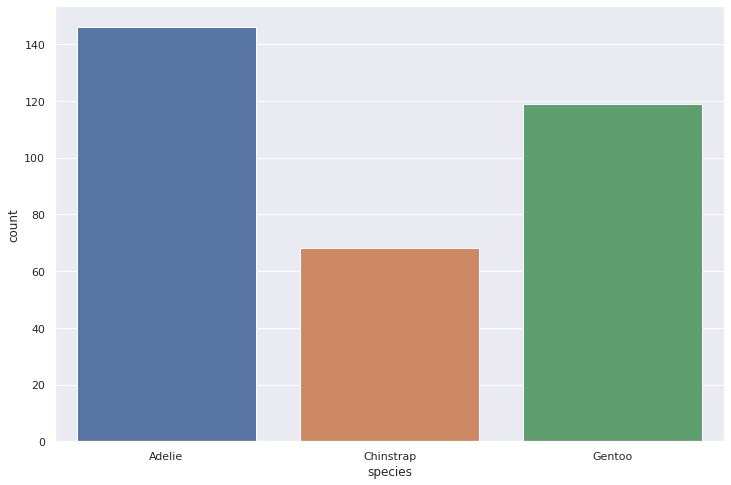

In [81]:
sns.countplot(x='species', data=penguins_df)


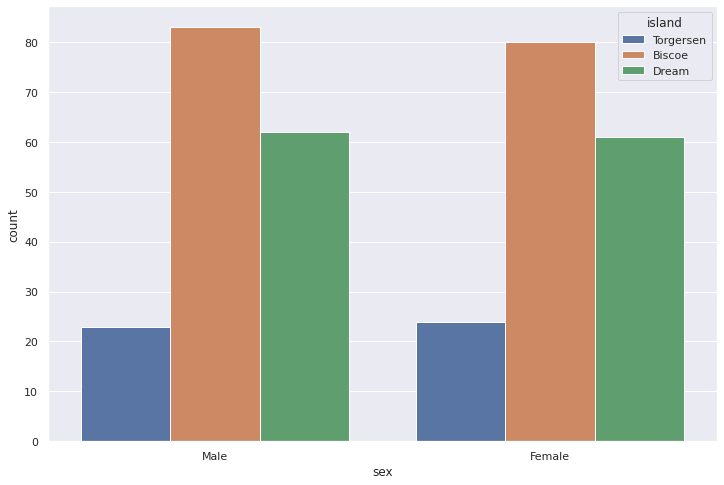

In [69]:
sns.set(rc={'figure.figsize': (12,8)})
ax =sns.countplot(x= 'sex', hue = 'island', data = penguins_df)  
ax

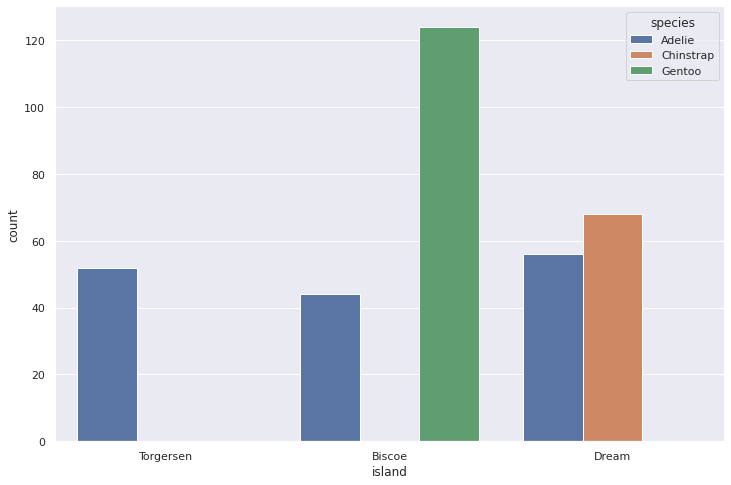

In [50]:
ax = sns.countplot(x='island', hue = 'species', data= penguins_df )
#ax = sns.catplot(x= 'species', hue = 'island', data = penguins_df, kind ='count')
ax

## **Pivot table counting the number of penguins by species on each island**


In [88]:
# Pivot table counting the number of penguins by species on each island
countPenguins_df = pd.pivot_table(penguins_df,index = 'island', columns = 'species', values = 'body_mass_g',aggfunc='count', fill_value=0)
countPenguins_df

species,Adelie,Chinstrap,Gentoo
island,,,
Biscoe,44,0,119
Dream,55,68,0
Torgersen,47,0,0


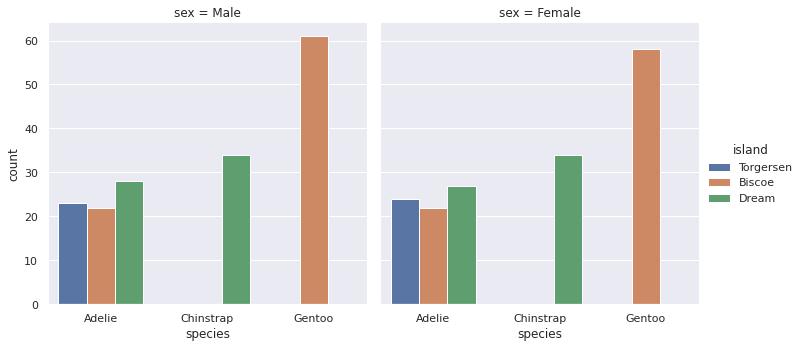

In [ ]:
ax = sns.catplot(x= 'species', hue = 'island', col= 'sex', data = penguins_df, kind ='count')

#**Pair Plot as a guide for analysis of Qualitative data**

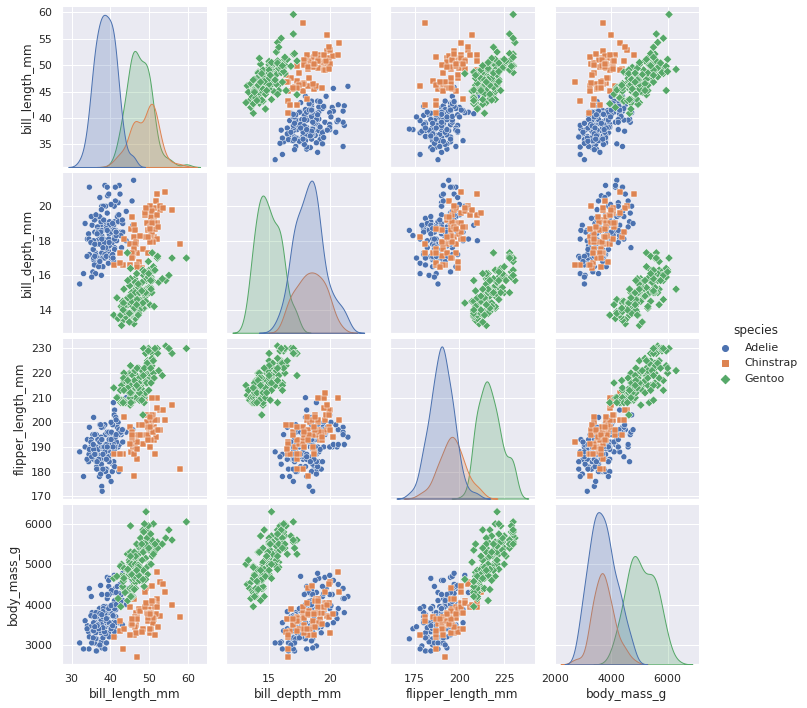

In [65]:
#sns.pairplot(penguins_df, plot_kws = {"color": "green"}) - alternative plot
sns.pairplot(penguins_df, hue='species', markers=['o','s','D'])
# Assigning a hue variable adds a semantic mapping and changes the default marginal plot to a layered kernel density estimate (KDE):

#Bar Chart

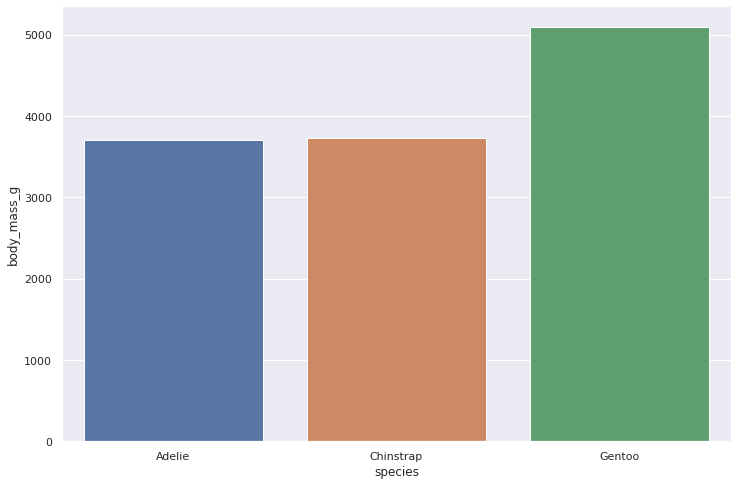

In [ ]:
ax = sns.barplot(y = 'body_mass_g', x = 'species',  data = penguins_df, ci = None)
ax         

#Stacked Histogram

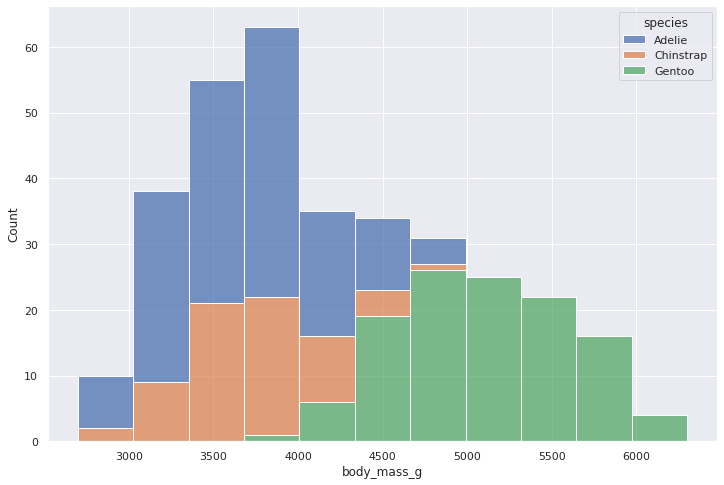

In [82]:
ax= sns.histplot(penguins_df, x="body_mass_g", hue="species", multiple="stack")




# **Findings Correlations**



## **Scatter Plot**


*   Penguin body mass is positively correlated to flipper length
*   Gentoo is the larger bird with the larger body mass and flipper length
*   Chinstrap and Adelie are close in median body mass size, with Adelie having a  larger number of species.



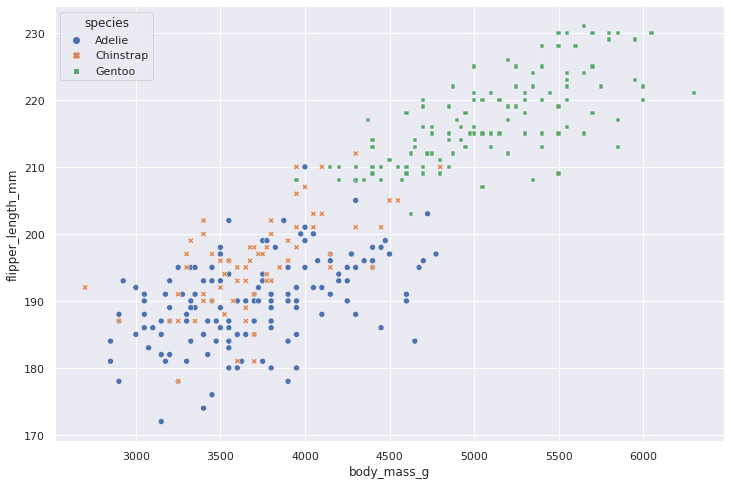

In [ ]:
sns.set(rc={'figure.figsize': (12,8)})
sns.scatterplot(x = 'body_mass_g' , y = 'flipper_length_mm', hue= 'species', style= 'species', data = penguins_df)  


 ## **Box and Swarm Plots**

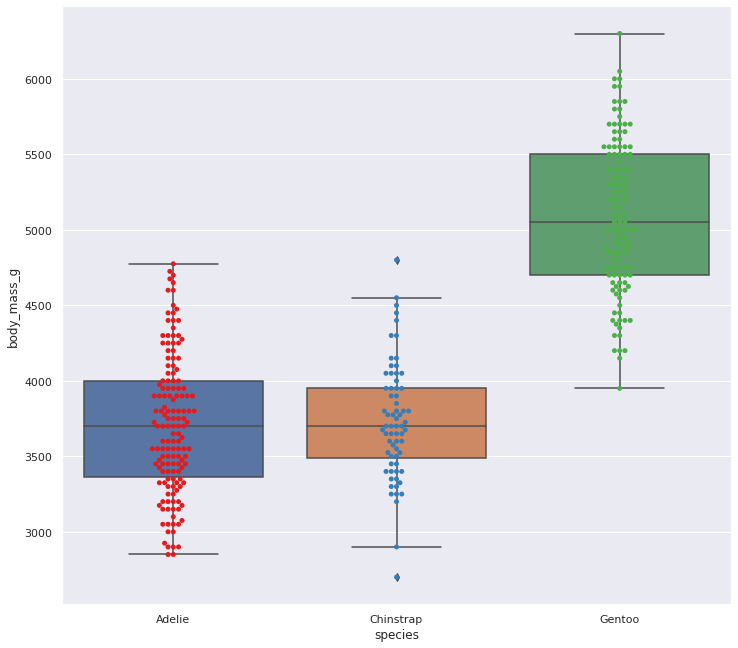

In [ ]:

sns.set(rc={'figure.figsize': (12,11)})
ax = sns.boxplot(y="body_mass_g", x="species", data=penguins_df)
ax = sns.swarmplot(y='body_mass_g', x="species", data=penguins_df, palette='Set1')

# **Correlation Matrix**

*   No significant findings




In [ ]:
corr_x = penguins_df[['body_mass_g', 'bill_length_mm', 'flipper_length_mm']].corr()
corr_x

,body_mass_g,bill_length_mm,flipper_length_mm
body_mass_g,1.000000,0.589451,0.872979
bill_length_mm,0.589451,1.000000,0.653096
flipper_length_mm,0.872979,0.653096,1.000000


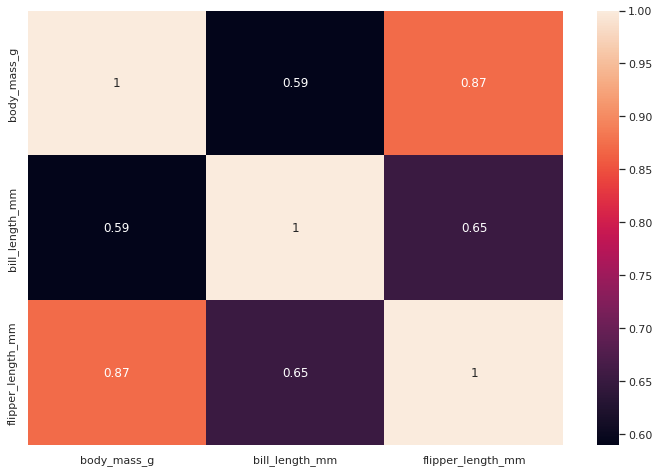

In [ ]:
hm = sns.heatmap(corr_x, annot = True)
hm